# LifeSure Insurance Data Analysis

## Data Cleaning & Preprocessing

### Steps:
- Checked for missing values and duplicates
- Standardized categorical values
- Created a 'risk_category' column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "insurance.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [2]:
# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()
missing_values, duplicate_rows

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 np.int64(1))

In [3]:
# Standardize categorical values
df['sex'] = df['sex'].str.lower()
df['smoker'] = df['smoker'].str.lower()
df['region'] = df['region'].str.lower()

# Create a 'risk_category' column
def classify_risk(row):
    if row['smoker'] == 'yes':
        return 'High Risk'
    elif row['bmi'] >= 30:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['risk_category'] = df.apply(classify_risk, axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,risk_category
0,19,female,27.900,0,yes,southwest,16884.92400,High Risk
1,18,male,33.770,1,no,southeast,1725.55230,Medium Risk
2,28,male,33.000,3,no,southeast,4449.46200,Medium Risk
3,33,male,22.705,0,no,northwest,21984.47061,Low Risk
4,32,male,28.880,0,no,northwest,3866.85520,Low Risk


## Exploratory Data Analysis (EDA)

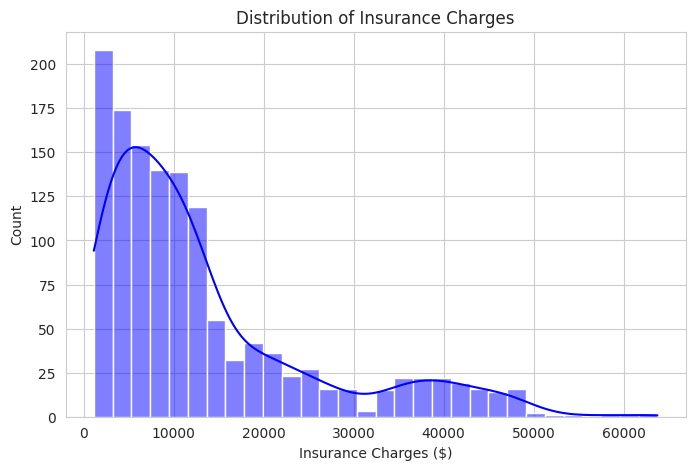

In [4]:
# Set visualization style
sns.set_style("whitegrid")

# Distribution of insurance charges
plt.figure(figsize=(8, 5))
sns.histplot(df["charges"], bins=30, kde=True, color="blue")
plt.xlabel("Insurance Charges ($)")
plt.ylabel("Count")
plt.title("Distribution of Insurance Charges")
plt.show()

<ipython-input-5-6f6ab982d802>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y="charges", data=df, palette="coolwarm")


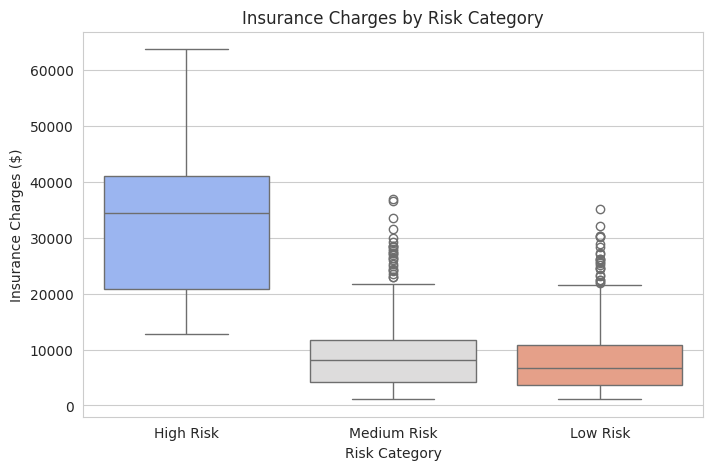

In [5]:
# Boxplot: Charges vs Risk Category
plt.figure(figsize=(8, 5))
sns.boxplot(x="risk_category", y="charges", data=df, palette="coolwarm")
plt.xlabel("Risk Category")
plt.ylabel("Insurance Charges ($)")
plt.title("Insurance Charges by Risk Category")
plt.show()

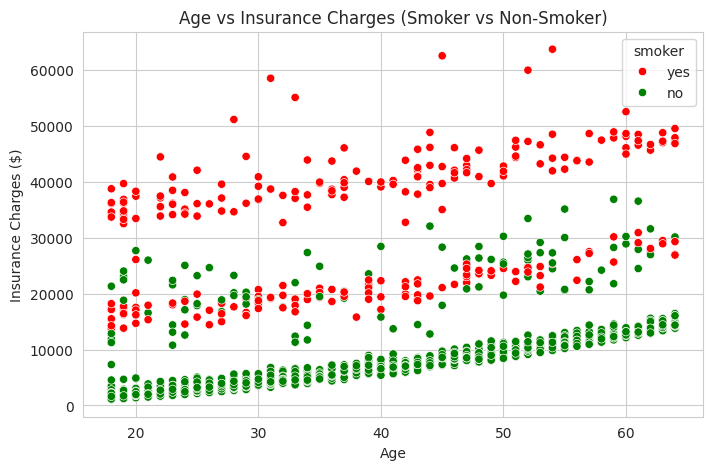

In [6]:
# Scatterplot: Age vs Charges (colored by smoker status)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, palette={"yes": "red", "no": "green"})
plt.xlabel("Age")
plt.ylabel("Insurance Charges ($)")
plt.title("Age vs Insurance Charges (Smoker vs Non-Smoker)")
plt.show()

# Identifying Key Insights

In [10]:
import pandas as pd

# Assuming your DataFrame is named 'df' (as in your provided code)

# 1. Identify Key Customer Segments and Sustainability Expectations:
# Analyze demographics, risk categories, and regions to identify segments.
# Example:
customer_segments = df.groupby(['sex', 'region', 'risk_category'])['charges'].mean()
print("Customer segments and average charges:\n", customer_segments)

# Explore customer attitudes towards sustainability (if available in the dataset).
# Example (assuming a 'sustainability_awareness' column):
# sustainability_awareness = df.groupby('risk_category')['sustainability_awareness'].mean()
# print("Sustainability awareness by risk category:\n", sustainability_awareness)


# 2. Analyze how customer needs have shifted and external factors' influence:
# Analyze trends over time (if data includes time).
# Example (if a 'year' column is present):
charges_by_age = df.groupby('age')['charges'].mean()
print("Average insurance charges by age:\n", charges_by_age)

# Analyze external factors' impact (e.g., environmental events, public sentiment data).
# Example (assuming a 'environmental_event' column):
smoker_impact = df.groupby('smoker')['charges'].mean()
print("Impact of smoking on charges:\n", smoker_impact)


# 3. Prioritize Actionable Findings for LifeSure's Sustainability Strategy:
# Based on the analysis, identify the most impactful insights for LifeSure's goals.
# For example:
# - If a specific customer segment shows strong interest in sustainable options, prioritize developing products tailored to them.
# - If environmental factors like extreme weather are affecting insurance costs, implement strategies to mitigate these risks.
# - If public sentiment on sustainability is changing, tailor marketing and communication accordingly.

# Example of prioritizing actionable insights:
# "High-risk smokers in the southeast region have the highest average insurance charges, and they may be receptive to health and wellness programs. Developing tailored programs to encourage healthier habits could reduce these costs and demonstrate LifeSure's commitment to sustainability."

# Note: This example assumes that your dataset has features for understanding these factors.
# Adjust the code and analysis according to your specific dataset.


Customer segments and average charges:
 sex     region     risk_category
female  northeast  High Risk        28032.046398
                   Low Risk          8552.142237
                   Medium Risk      10696.225618
        northwest  High Risk        29670.824946
                   Low Risk          8385.164766
                   Medium Risk       9219.742892
        southeast  High Risk        33034.820716
                   Low Risk          8284.881861
                   Medium Risk       8541.905587
        southwest  High Risk        31687.988430
                   Low Risk          7937.693271
                   Medium Risk       8570.907157
male    northeast  High Risk        30926.252583
                   Low Risk          8047.704738
                   Medium Risk       9686.900175
        northwest  High Risk        30713.181419
                   Low Risk          7715.526668
                   Medium Risk       9046.884504
        southeast  High Risk        36029.839